<br><br>
<font size='6'><b>Class Activation Map (CAM)
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Hyunseok Oh<br>
https://sddo.gist.ac.kr/<br>
SDDO Lab at GIST
</div>

Table of Contents
1. [Code implementation using tensorflow with MNIST data](#cell-1)  
    1.1 [Import library](#cell-1.1)  
    1.2 [Load MNIST data](#cell-1.2)  
    1.3 [Build an architecture](#cell-1.3)  
    1.4 [Training](#cell-1.4)  
    1.5 [Test and evaluating](#cell-1.5)  
    1.6 [Review CAM data](#cell-1.6)  
1. [Appendix: output images from convolutional layer](#cell-2)  
    2.1 [Outputs of the first convolutional layer](#cell-2.1)  
    2.2 [Outputs of the first pooling layer](#cell-2.2)  
    2.3 [Outputs of the second convolutional layer](#cell-2.3)  
    2.4 [Outputs of the GAP layer](#cell-2.4)  
    2.5 [Weight values](#cell-2.5)  
    2.6 [Classification results](#cell-2.6)  

- Source paper from http://cnnlocalization.csail.mit.edu/
- Source code from https://github.com/metalbubble/CAM

<a name = 'cell-1'></a>

# Code implementation using tensorflow with MNIST data

<a name = 'cell-1.1'></a>

#  Import library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

<a name = 'cell-1.2'></a>

# Load MNIST dataset

In [ ]:
mnist = tf.keras.datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x, test_x = train_x/255.0, test_x/255.0

train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

train_x, train_y = train_x[0:6000], train_y[0:6000]
test_x, test_y = test_x[0:6000], test_y[0:6000]

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

NameError: ignored

<a name = 'cell-1.3'></a>

# Build an architecture

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters = 64,
                          kernel_size = (3, 3),
                          activation = 'relu',
                          padding = 'SAME',
                          input_shape = (14, 14, 32)),
    
    tf.keras.layers.GlobalAveragePooling2D(),
    
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 global_average_pooling2d_1   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trai

<a name = 'cell-1.4'></a>

# Training

In [ ]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [ ]:
history = model.fit(train_x, train_y, batch_size = 128, epochs = 20)

Epoch 1/20
47/47 [==============================] - 5s 109ms/step - loss: 1.1233 - accuracy: 0.6608
Epoch 2/20
47/47 [==============================] - 5s 109ms/step - loss: 1.0929 - accuracy: 0.6703
Epoch 3/20
47/47 [==============================] - 5s 109ms/step - loss: 1.0436 - accuracy: 0.6920
Epoch 4/20
47/47 [==============================] - 5s 108ms/step - loss: 1.0156 - accuracy: 0.7015
Epoch 5/20
47/47 [==============================] - 5s 109ms/step - loss: 0.9810 - accuracy: 0.7148
Epoch 6/20
47/47 [==============================] - 5s 110ms/step - loss: 0.9595 - accuracy: 0.7160
Epoch 7/20
47/47 [==============================] - 5s 109ms/step - loss: 0.9234 - accuracy: 0.7327
Epoch 8/20
47/47 [==============================] - 5s 109ms/step - loss: 0.8992 - accuracy: 0.7340
Epoch 9/20
47/47 [==============================] - 5s 109ms/step - loss: 0.8764 - accuracy: 0.7480
Epoch 10/20
47/47 [==============================] - 5s 109ms/step - loss: 0.8507 - accuracy: 0.7490

[1.1232703924179077, 1.0928587913513184, 1.0436186790466309, 1.0156266689300537, 0.9810084700584412, 0.9594765901565552, 0.923374354839325, 0.899225115776062, 0.8763862252235413, 0.850709855556488, 0.8244147896766663, 0.8011233806610107, 0.7865447402000427, 0.7711854577064514, 0.7546486258506775, 0.7439780235290527, 0.728253960609436, 0.7003166675567627, 0.691825270652771, 0.6797006726264954]


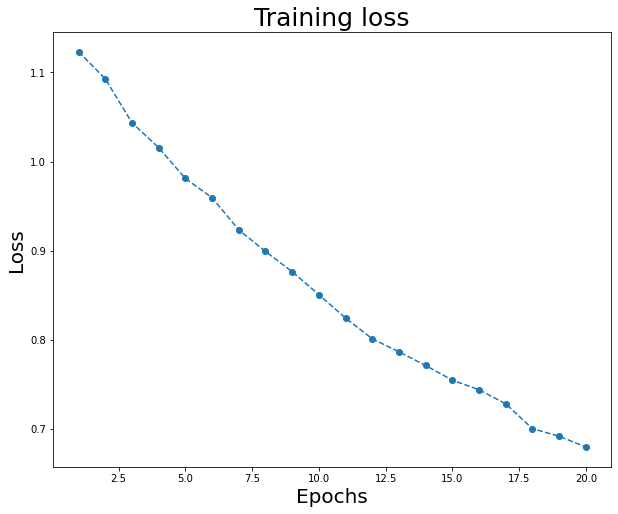

In [ ]:
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (10,8))
plt.plot(epochs, loss, "o--", label="Training loss")
plt.title("Training loss", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Loss", fontsize = 20)
plt.savefig('Training loss.tiff')
print(loss)
plt.show()

[0.6608333587646484, 0.6703333258628845, 0.6919999718666077, 0.7014999985694885, 0.7148333191871643, 0.7160000205039978, 0.7326666712760925, 0.734000027179718, 0.7480000257492065, 0.7490000128746033, 0.7558333277702332, 0.7666666507720947, 0.7714999914169312, 0.7771666646003723, 0.781000018119812, 0.7778333425521851, 0.7839999794960022, 0.7978333234786987, 0.7961666584014893, 0.8028333187103271]


<Figure size 432x288 with 0 Axes>

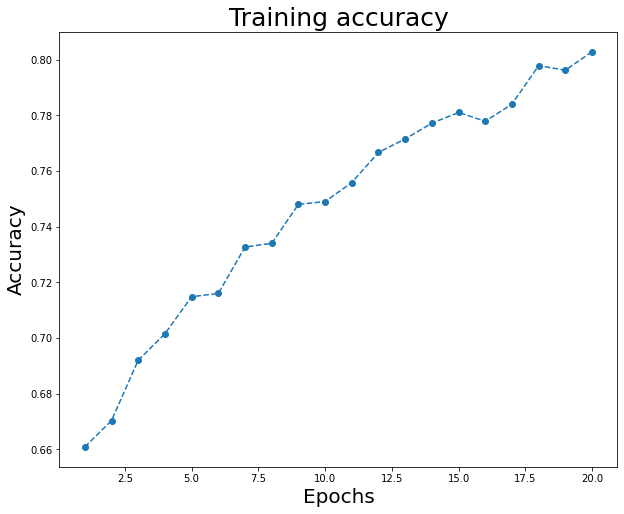

In [ ]:
plt.clf()
plt.figure(figsize = (10,8))
acc = history.history["accuracy"]
plt.plot(epochs, acc, "o--", label="Training accuracy")
plt.title("Training accuracy", fontsize = 25)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.savefig('Accuracy.tiff')
print(acc)
plt.show()

<a name = 'cell-1.5'></a>

# Test and evaluating

In [ ]:
# accuracy test
test_loss, test_acc = model.evaluate(test_x, test_y)

188/188 [==============================] - 2s 10ms/step - loss: 0.7278 - accuracy: 0.7770


<a name = 'cell-1.6'></a>

# Review CAM data

In [ ]:
## Define the CAM
# get max pooling layer and fully connected layer 
conv_layer = model.get_layer(index = 2)
fc_layer = model.layers[4].get_weights()[0]

# Class activation map 
my_map = tf.matmul(conv_layer.output, fc_layer)
CAM = tf.keras.Model(inputs = model.inputs, outputs = my_map)

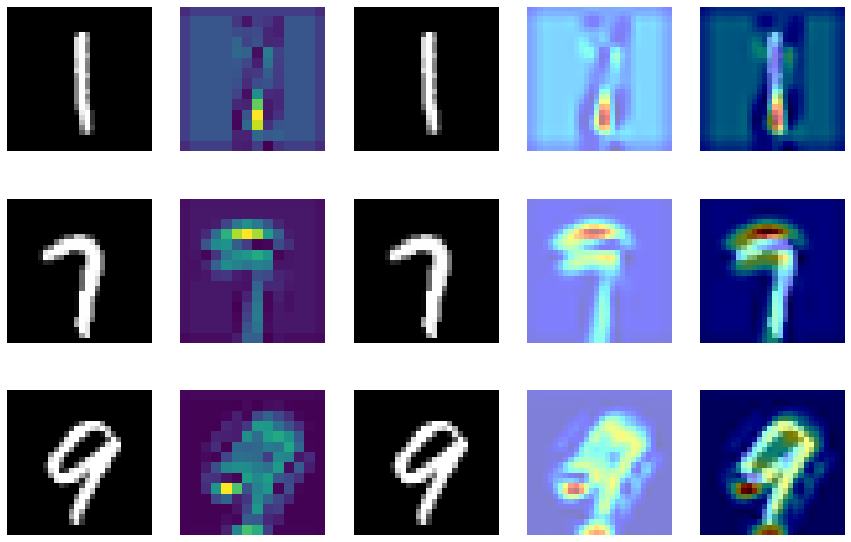

In [ ]:
## Compare the CAM data from input of 1, 7 and 9
# Select indices of test data of 1, 7 and 9
list_1 = []
list_7 = []
list_9 = []
for i in range(1000):
    if test_y[i] == 1:
        list_1.append(i)
    if test_y[i] == 7:
        list_7.append(i)
    if test_y[i] == 9:
        list_9.append(i)

## Create CAM data for "1"
test_idx_1 = [list_1[np.random.randint(0, 90)]]
test_image_1 = test_x[test_idx_1]
pred_1 = np.argmax(model.predict(test_image_1), axis = 1)
predCAM_1 = CAM.predict(test_image_1)

attention_1 = predCAM_1[:,:,:,pred_1]
attention_1 = np.abs(np.reshape(attention_1,(14,14)))

resized_attention_1 = cv2.resize(attention_1,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_1 = cv2.resize(test_image_1.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

## Create CAM data for "7"
test_idx_2 = [list_7[np.random.randint(0, 90)]]
test_image_2 = test_x[test_idx_2]

pred_2 = np.argmax(model.predict(test_image_2), axis = 1)
predCAM_2 = CAM.predict(test_image_2)

attention_2 = predCAM_2[:,:,:,pred_2]
attention_2 = np.abs(np.reshape(attention_2,(14,14)))

resized_attention_2 = cv2.resize(attention_2,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_2 = cv2.resize(test_image_2.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)

## Create CAM data for "9"
test_idx_3 = [list_9[np.random.randint(0, 90)]]
test_image_3 = test_x[test_idx_3]

pred_3 = np.argmax(model.predict(test_image_3), axis = 1)
predCAM_3 = CAM.predict(test_image_3)

attention_3 = predCAM_3[:,:,:,pred_3]
attention_3 = np.abs(np.reshape(attention_3,(14,14)))

resized_attention_3 = cv2.resize(attention_3,
                                 (28, 28), 
                                 interpolation = cv2.INTER_CUBIC)

resized_test_x_3 = cv2.resize(test_image_3.reshape(28,28), 
                              (28, 28),
                              interpolation = cv2.INTER_CUBIC)
# Plot
plt.figure(figsize = (15,10))
plt.subplot(3,5,1)
plt.imshow(test_x[test_idx_1].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,2)
plt.imshow(attention_1)
plt.axis('off')
plt.subplot(3,5,3)
plt.imshow(resized_test_x_1, 'gray')
plt.axis('off')
plt.subplot(3,5,4)
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,5)
plt.imshow(resized_test_x_1, 'gray')
plt.imshow(resized_attention_1, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,5,6)
plt.imshow(test_x[test_idx_2].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,7)
plt.imshow(attention_2)
plt.axis('off')
plt.subplot(3,5,8)
plt.imshow(resized_test_x_2, 'gray')
plt.axis('off')
plt.subplot(3,5,9)
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,10)
plt.imshow(resized_test_x_2, 'gray')
plt.imshow(resized_attention_2, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,5,11)
plt.imshow(test_x[test_idx_3].reshape(28,28), 'gray')
plt.axis('off')
plt.subplot(3,5,12)
plt.imshow(attention_3)
plt.axis('off')
plt.subplot(3,5,13)
plt.imshow(resized_test_x_3, 'gray')
plt.axis('off')
plt.subplot(3,5,14)
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.subplot(3,5,15)
plt.imshow(resized_test_x_3, 'gray')
plt.imshow(resized_attention_3, 'jet', alpha = 0.5)
plt.axis('off')
plt.show()

<a name = 'cell-2'></a>

# Appendix: output images from convolutional layer

<a name = 'cell-2.1'></a>

## Outputs of the first convolutional layer

In [ ]:
conv_layer = model.get_layer(index = 0)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

<a name = 'cell-2.2'></a>

## Outputs of the first pooling layer

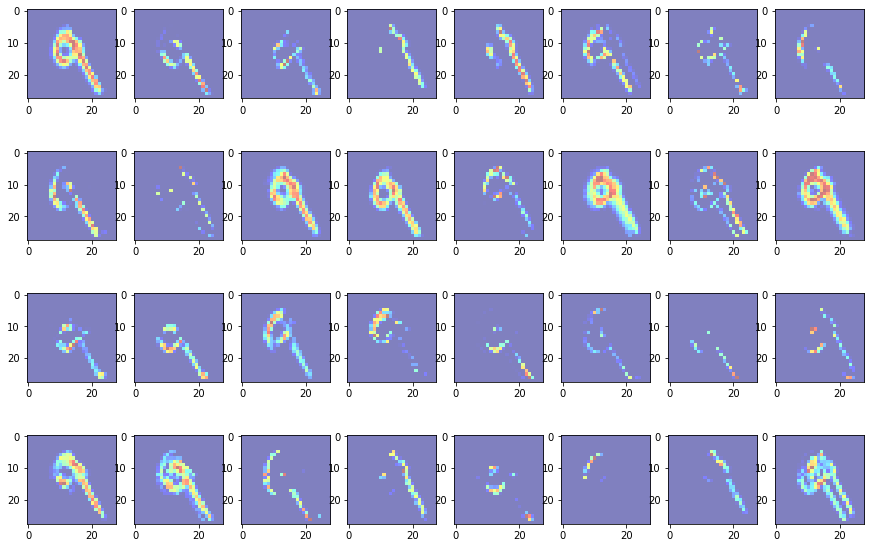

In [ ]:
conv_layer = model.get_layer(index = 1)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 10))
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

<a name = 'cell-2.3'></a>

## Outputs of the second convolutional layer

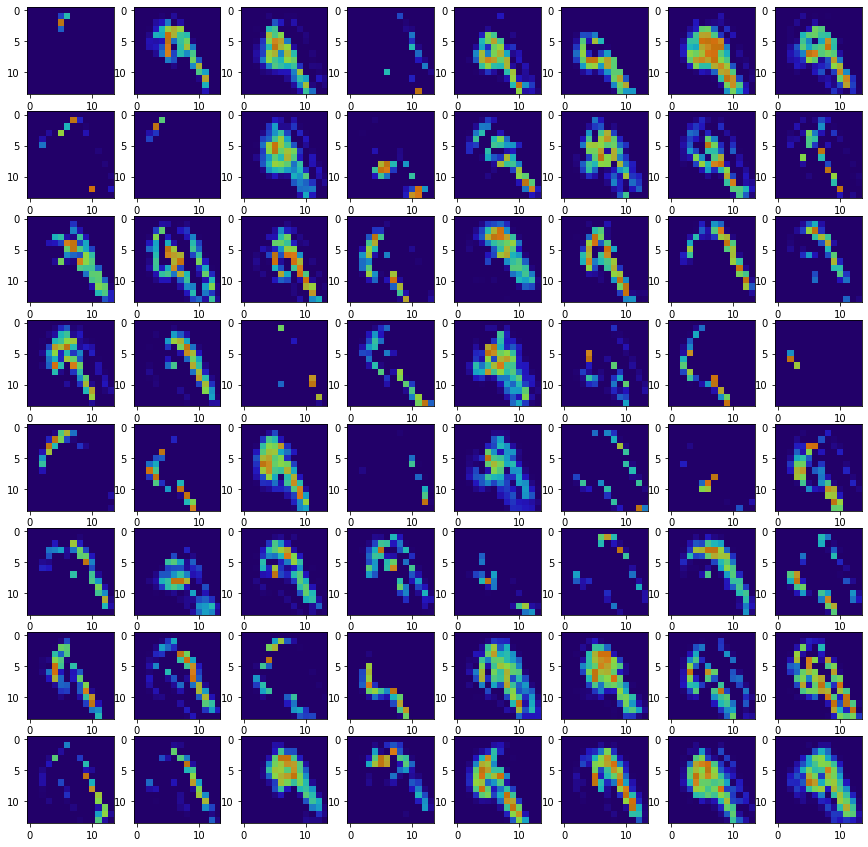

In [ ]:
conv_layer = model.get_layer(index = 2)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)

plt.figure(figsize = (15, 15))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(predy[0, :, :, i])
    plt.imshow(predy[0, :, :, i], 'jet', alpha = 0.5)

<a name = 'cell-2.4'></a>

## Outputs of the GAP layer

<class 'keras.engine.functional.Functional'>
[[3.2538301e-04 1.3145740e-02 1.8342849e-02 6.4189913e-04 1.8922605e-02
  1.2383378e-02 2.6051551e-02 1.8552996e-02 5.0751789e-04 8.2196471e-05
  2.3661762e-02 3.4314413e-03 9.1514876e-03 1.6556235e-02 1.8732822e-02
  4.1196737e-03 1.2458829e-02 1.1697009e-02 1.3716836e-02 5.4132384e-03
  1.6104264e-02 1.8052269e-02 7.3324344e-03 6.7322724e-03 1.4497213e-02
  1.7068744e-02 1.9402716e-04 4.4943113e-03 2.0891173e-02 3.6298214e-03
  2.5049313e-03 1.4270601e-04 1.8031340e-03 1.6438840e-03 1.9527381e-02
  3.2120119e-04 2.4342027e-02 9.3886181e-04 6.8555918e-04 7.5177066e-03
  5.0546541e-03 1.1372726e-02 1.8823687e-02 7.7126864e-03 2.2052114e-03
  1.1238552e-03 8.6379740e-03 2.5470750e-03 1.0224198e-02 9.0861656e-03
  1.7675542e-03 4.0279734e-03 1.8007800e-02 2.6826601e-02 8.4685851e-03
  1.3876756e-02 2.8813931e-03 4.6497672e-03 2.1148268e-02 5.2852076e-03
  3.1662989e-02 2.3903916e-02 2.1469301e-02 3.4038071e-02]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


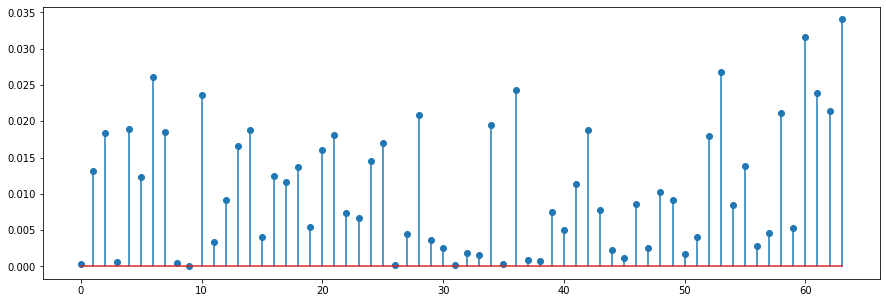

In [ ]:
conv_layer = model.get_layer(index = 3)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)
plt.figure(figsize = (15, 5))
plt.stem(predy[0, :])
print(predy)

<a name = 'cell-2.5'></a>

## Weights values

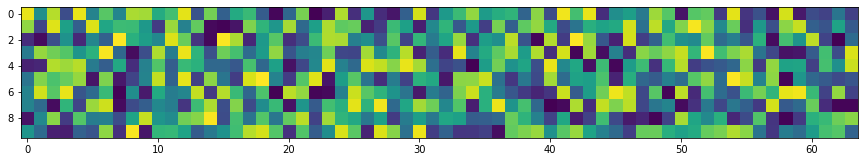

In [ ]:
w = model.get_weights()
plt.figure(figsize = (15, 5))
plt.imshow(w[4].T)

<a name = 'cell-2.6'></a>

## Classification results

<class 'keras.engine.functional.Functional'>
[[0.10008703 0.10086347 0.09776351 0.10238813 0.09960105 0.10006767
  0.10103684 0.09685528 0.09996381 0.10137317]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


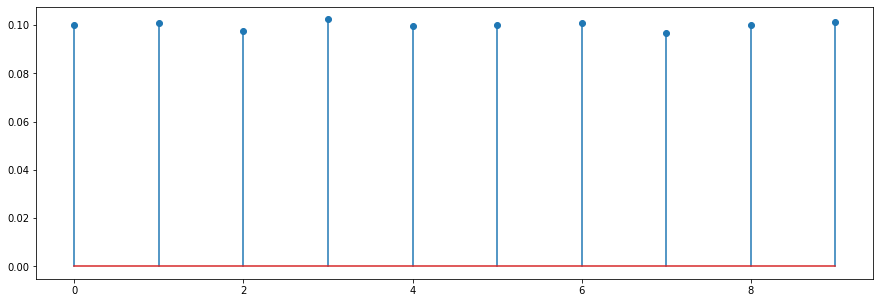

In [ ]:
conv_layer = model.get_layer(index = 4)
conv_layer = conv_layer.output
my_output = tf.keras.Model(inputs = model.inputs, outputs = conv_layer)

test_idx = [7]
test_image = test_x[test_idx]

pred = np.argmax(model.predict(test_image), axis = 1)
predy = my_output.predict(test_image)
print(type(my_output))
plt.figure(figsize = (15, 5))
plt.stem(predy[0, :])
print(predy)